In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [231]:
df = pd.read_csv("Energy.csv")
df

,Index,Units,Date,Month,Year,Day
0,0,13478,12/31/2004,12,2004,Friday
1,1,14097,12/30/2004,12,2004,Thursday
2,2,15223,12/29/2004,12,2004,Wednesday
3,3,17580,12/28/2004,12,2004,Tuesday
4,4,16718,12/27/2004,12,2004,Monday
...,...,...,...,...,...,...
5049,5049,20112,1/5/2018,1,2018,Friday
5050,5050,18193,1/4/2018,1,2018,Thursday
5051,5051,20473,1/3/2018,1,2018,Wednesday
5052,5052,19670,1/2/2018,1,2018,Tuesday


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   5054 non-null   int64 
 1   Units   5054 non-null   int64 
 2   Date    5054 non-null   object
 3   Month   5054 non-null   int64 
 4   Year    5054 non-null   int64 
 5   Day     5054 non-null   object
dtypes: int64(4), object(2)
memory usage: 237.0+ KB


In [233]:
df.Date = pd.to_datetime(df.Date)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Index   5054 non-null   int64         
 1   Units   5054 non-null   int64         
 2   Date    5054 non-null   datetime64[ns]
 3   Month   5054 non-null   int64         
 4   Year    5054 non-null   int64         
 5   Day     5054 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 237.0+ KB


In [235]:
np.unique(df.Day)

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [236]:
np.unique(df.Year)

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

In [237]:
np.unique(df.Month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [238]:
df.describe()

,Index,Units,Date,Month,Year
count,5054.000000,5054.000000,5054,5054.000000,5054.000000
mean,2526.500000,13891.478433,2011-09-01 12:00:00.000000256,6.500198,2011.169569
min,0.000000,10158.000000,2004-10-01 00:00:00,1.000000,2004.000000
25%,1263.250000,12454.000000,2008-03-17 06:00:00,4.000000,2008.000000
50%,2526.500000,13608.000000,2011-09-01 12:00:00,6.000000,2011.000000
75%,3789.750000,15050.500000,2015-02-15 18:00:00,10.000000,2015.000000
max,5053.000000,22297.000000,2018-08-02 00:00:00,12.000000,2018.000000
std,1459.108461,1897.726238,NaN,3.461859,4.011503


<Axes: >

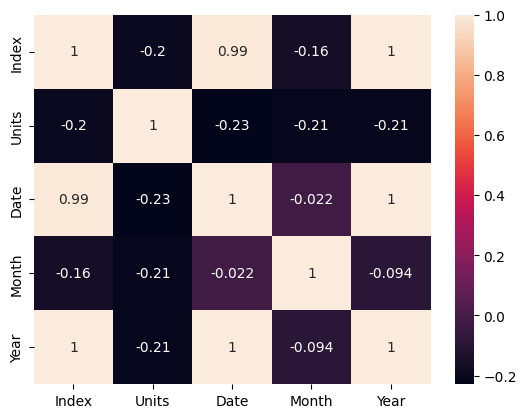

In [239]:
categorical = df.select_dtypes(exclude = ['object'])
sns.heatmap(categorical.corr(),annot = True)

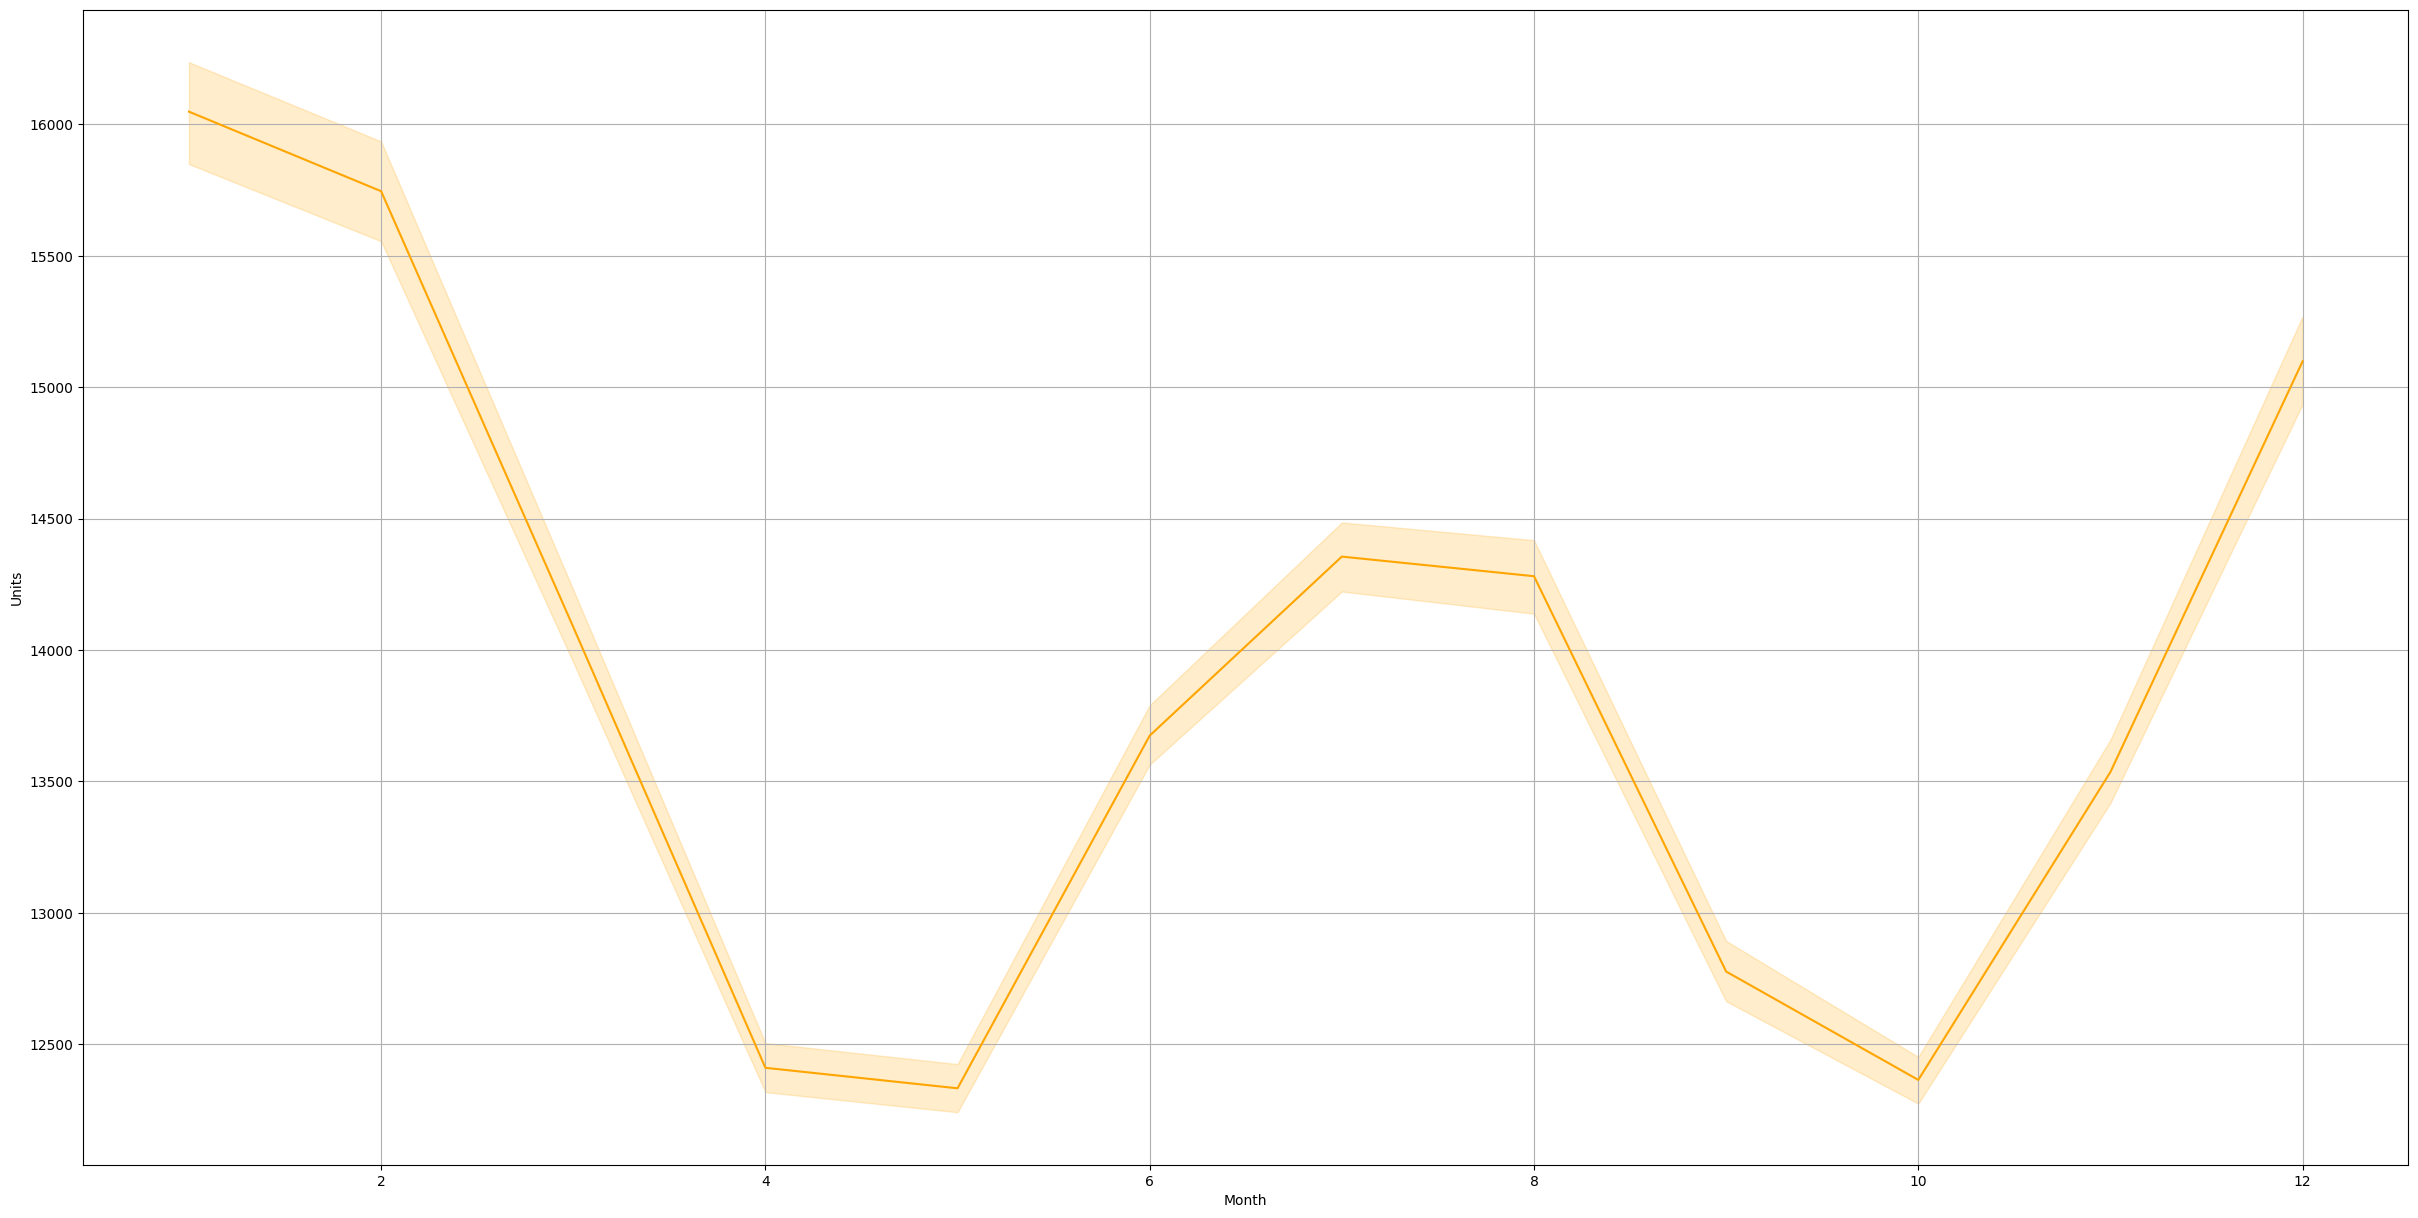

In [240]:
plt.figure(figsize = (30, 15))
sns.lineplot(x = df.Month, y = df.Units, color = 'orange')
plt.grid()

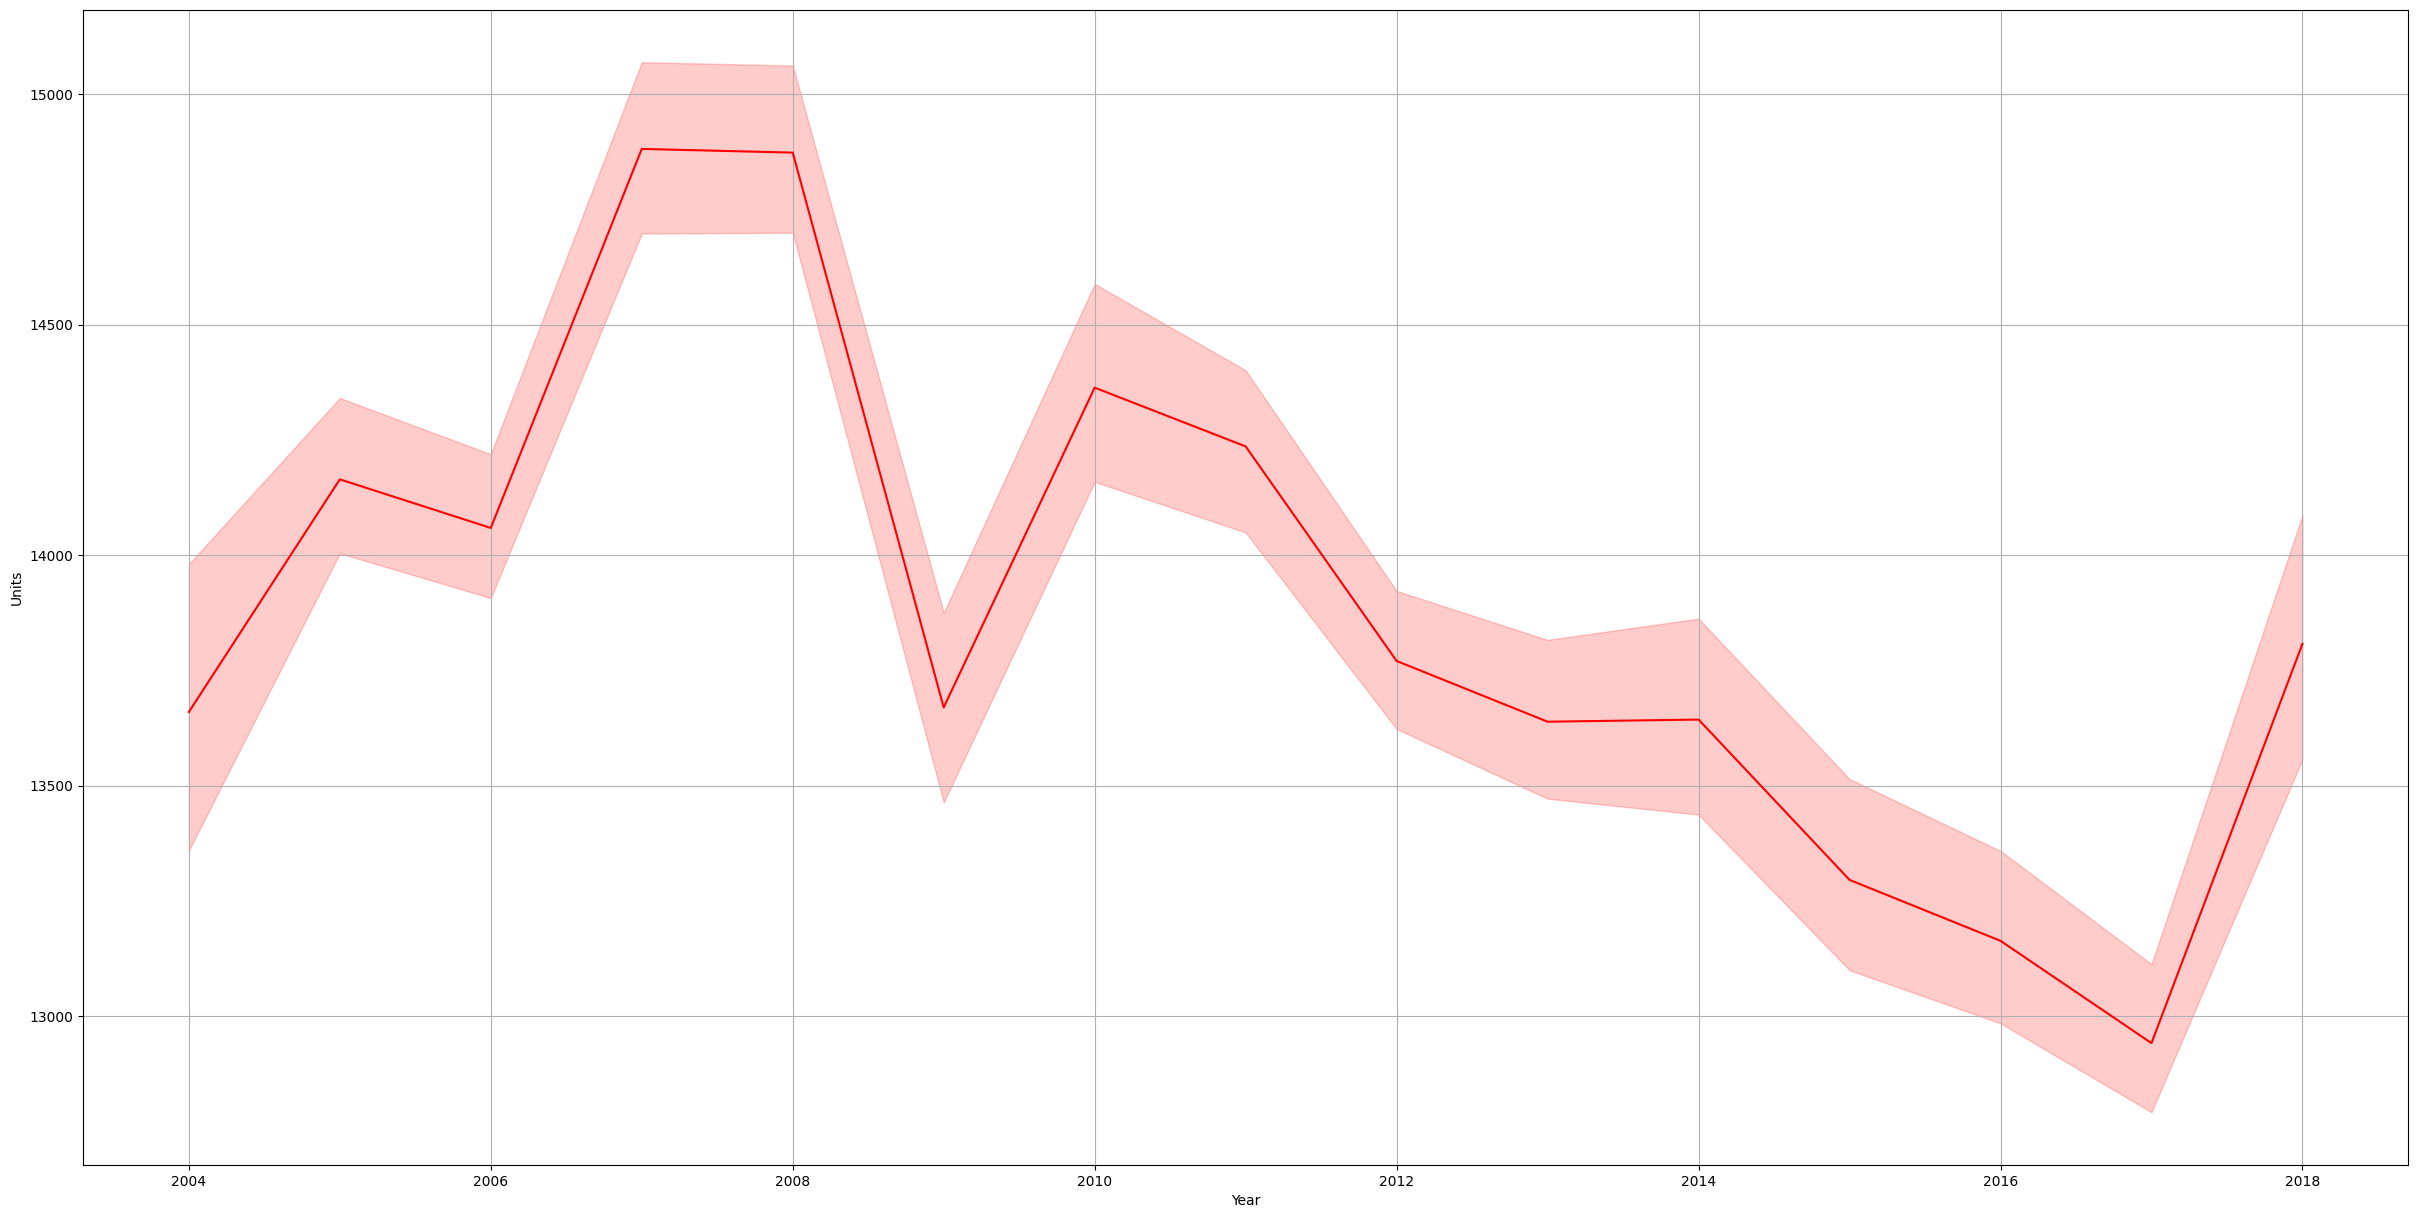

In [241]:
plt.figure(figsize = (30, 15))
sns.lineplot(x = df.Year, y = df.Units, color = 'red')
plt.grid()

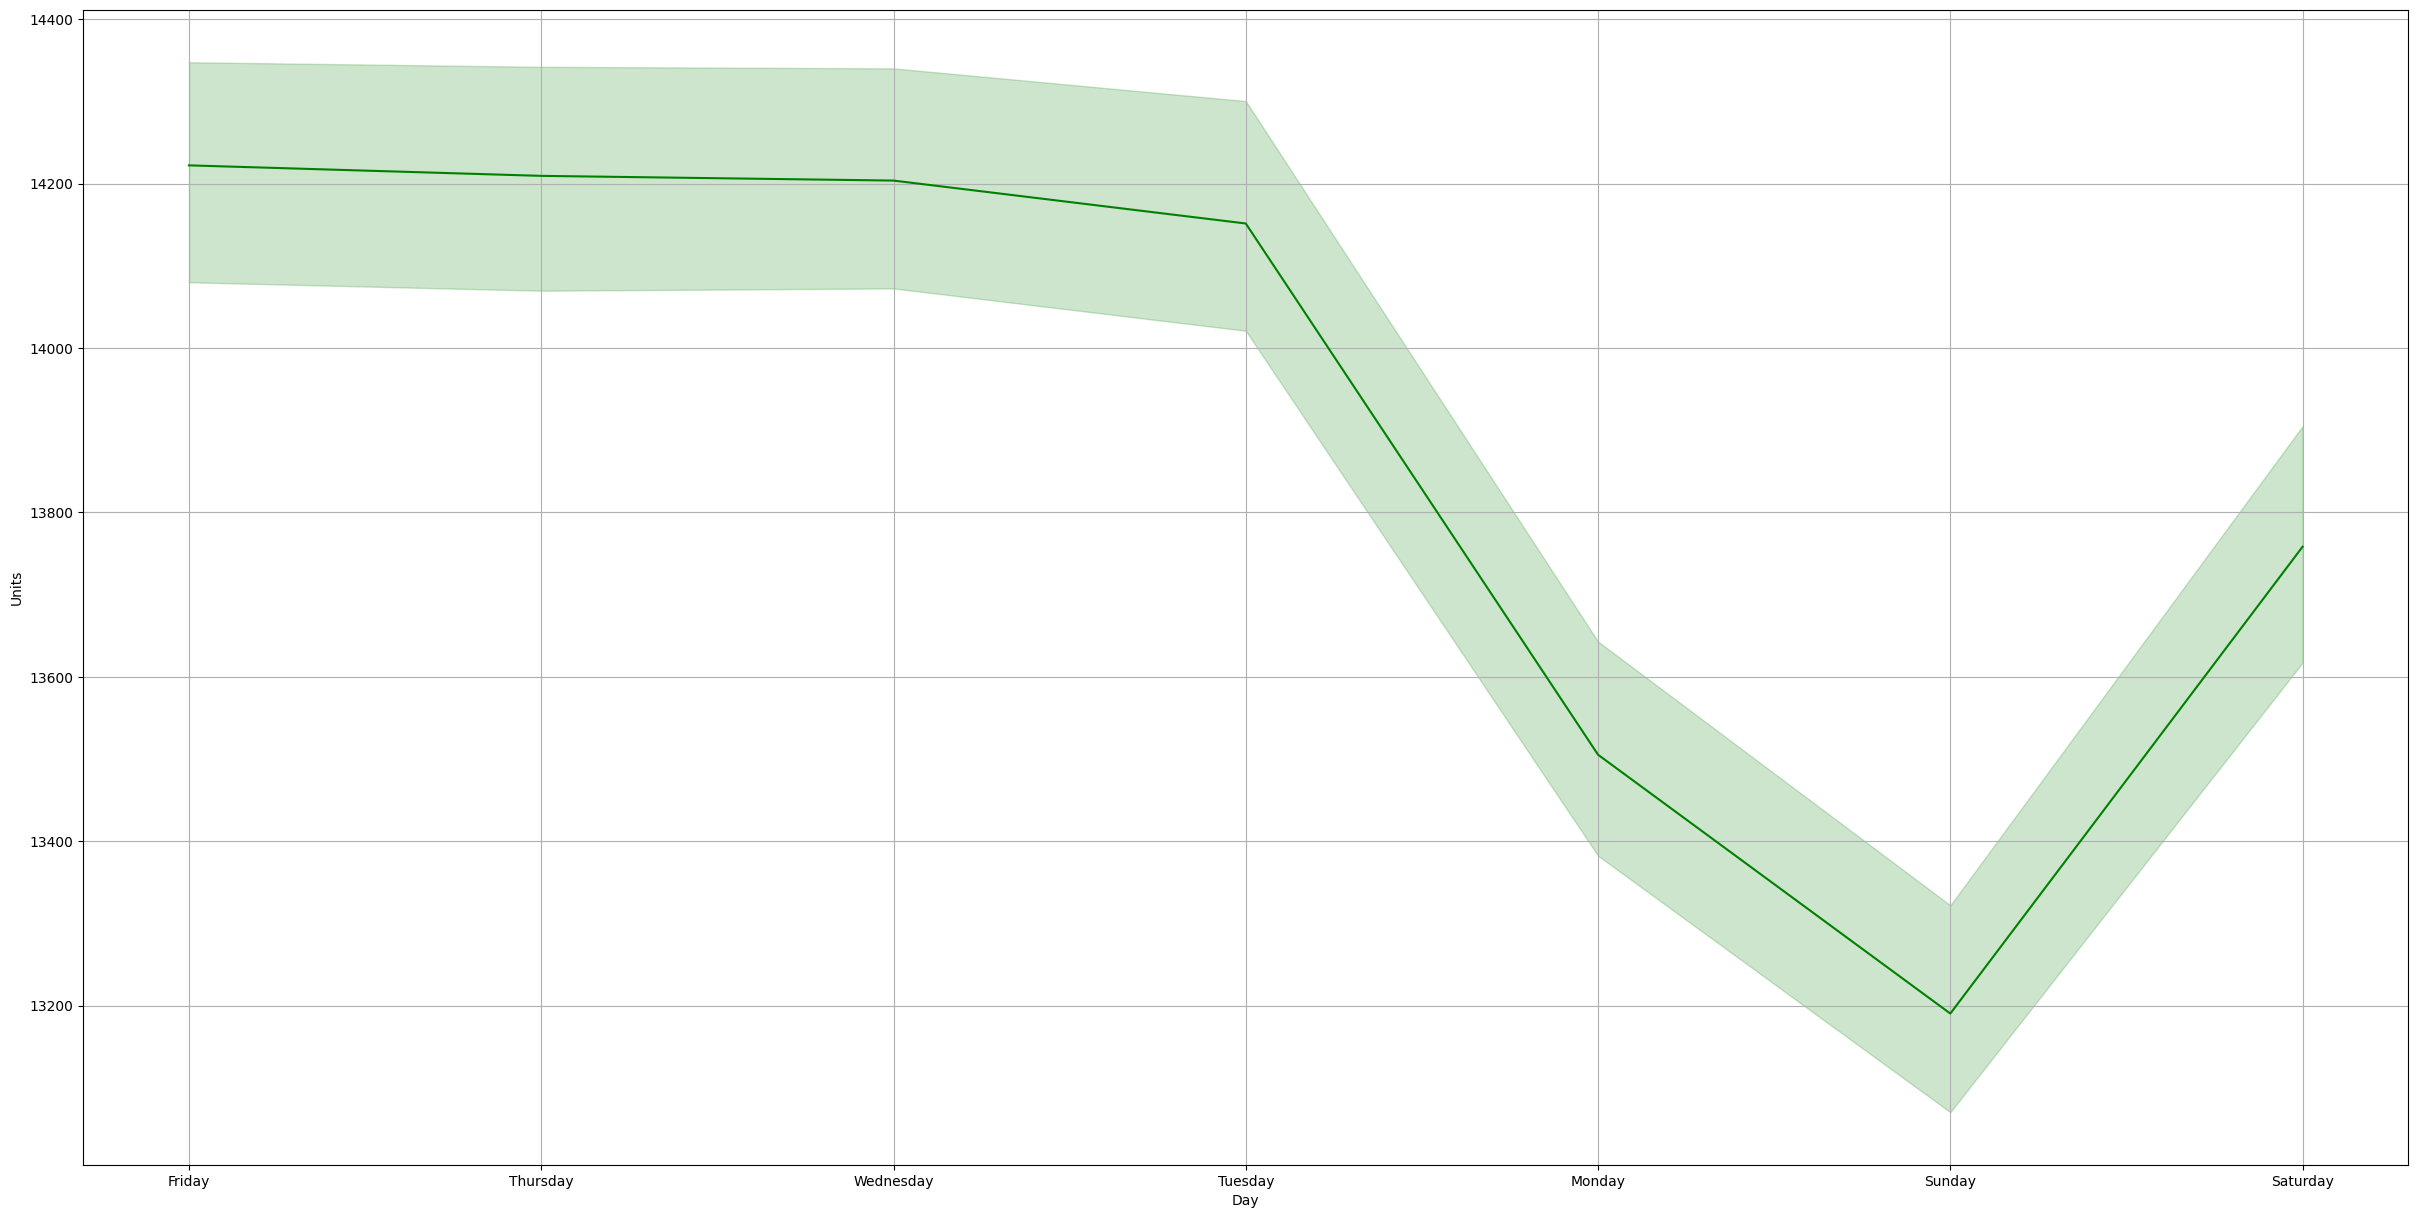

In [242]:
plt.figure(figsize = (30, 15))
sns.lineplot(x = df.Day, y = df.Units, color = 'green')
plt.grid()

In [243]:
x = df.Month.values
y = df.Units.values

In [244]:
train_x, test_x, train_y, test_y = tts(x, y, test_size = 0.3, random_state = 0)
train_x = train_x.reshape(-1,1)
test_x = test_x.reshape(-1,1)
print(train_x.shape)
print(test_x.shape)

(3537, 1)
(1517, 1)


In [245]:
Logistic = LogisticRegression()
Logistic.fit(train_x, train_y)

C:\Users\Aditya Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(Logistic.coef_)
print(Logistic.intercept_)

In [151]:
prediction = Logistic.predict(test_x)
prediction

array([15199, 17176, 12023, ..., 13822, 13822, 13822], dtype=int64)

In [152]:
log_mse = mean_squared_error(test_y,prediction)
log_rmse = np.sqrt(log_mse)
log_rmse

2072.4484201508835

In [153]:
Linear = LinearRegression()
Linear.fit(train_x, train_y)

LinearRegression()

In [154]:
prediction_linear = Linear.predict(test_x)

In [155]:
lin_mse = mean_squared_error(test_y,prediction_linear)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1808.9694174523236

In [156]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_x, train_y)

DecisionTreeRegressor()

In [157]:
prediction_dtr = tree_reg.predict(test_x)

In [158]:
dtr_mse = mean_squared_error(test_y,prediction_dtr)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

1413.1427742289388

In [159]:
scores = cross_val_score(tree_reg, train_x, train_y,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([1533.77457965, 1399.86583017, 1454.24021352, 1423.4829313 ,
       1373.17661521, 1452.16637353, 1452.81303431, 1532.06914894,
       1522.08226993, 1402.03814975])

In [210]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_x,train_y)

RandomForestRegressor()

In [199]:
prediction_forest = forest_reg.predict(test_x)

In [200]:
forest_mse = mean_squared_error(test_y,prediction_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1413.22834965405

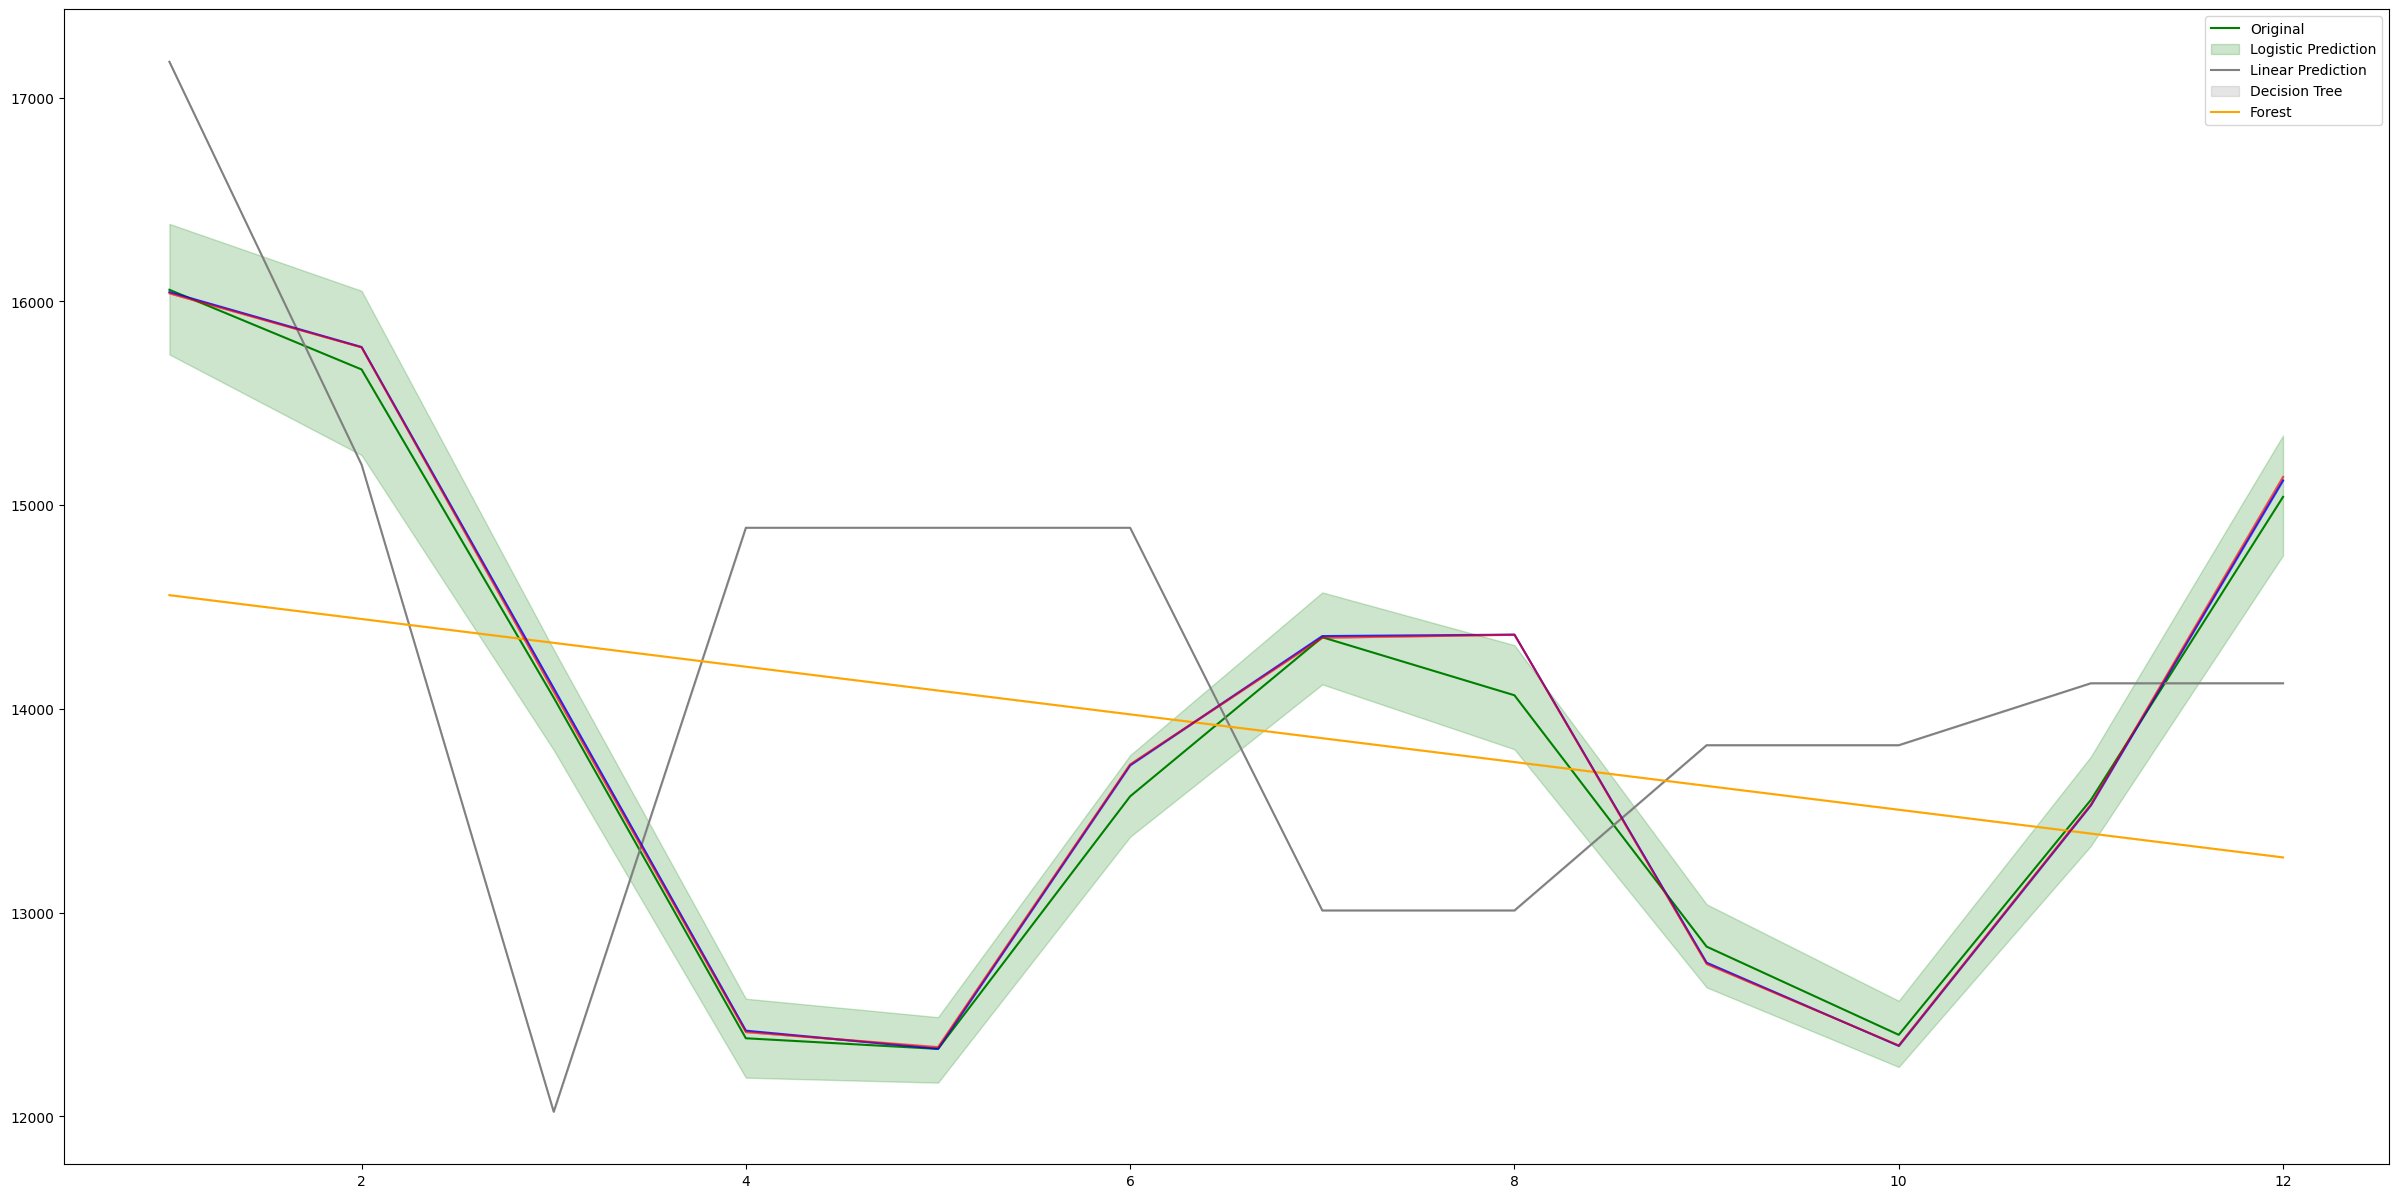

In [201]:
test_1_x = test_x.reshape(-1)
plt.figure(figsize = (30,15))
sns.lineplot(x = test_1_x,y = test_y, color = 'green')
sns.lineplot(x = test_1_x,y = prediction, color = 'grey')
sns.lineplot(x = test_1_x,y = prediction_linear, color = 'orange')
sns.lineplot(x = test_1_x,y = prediction_dtr, color = 'blue', alpha = 0.8)
sns.lineplot(x = test_1_x,y = prediction_forest, color = 'red',alpha = 0.6)
plt.legend(["Original","Logistic Prediction","Linear Prediction","Decision Tree","Forest"])
plt.show()

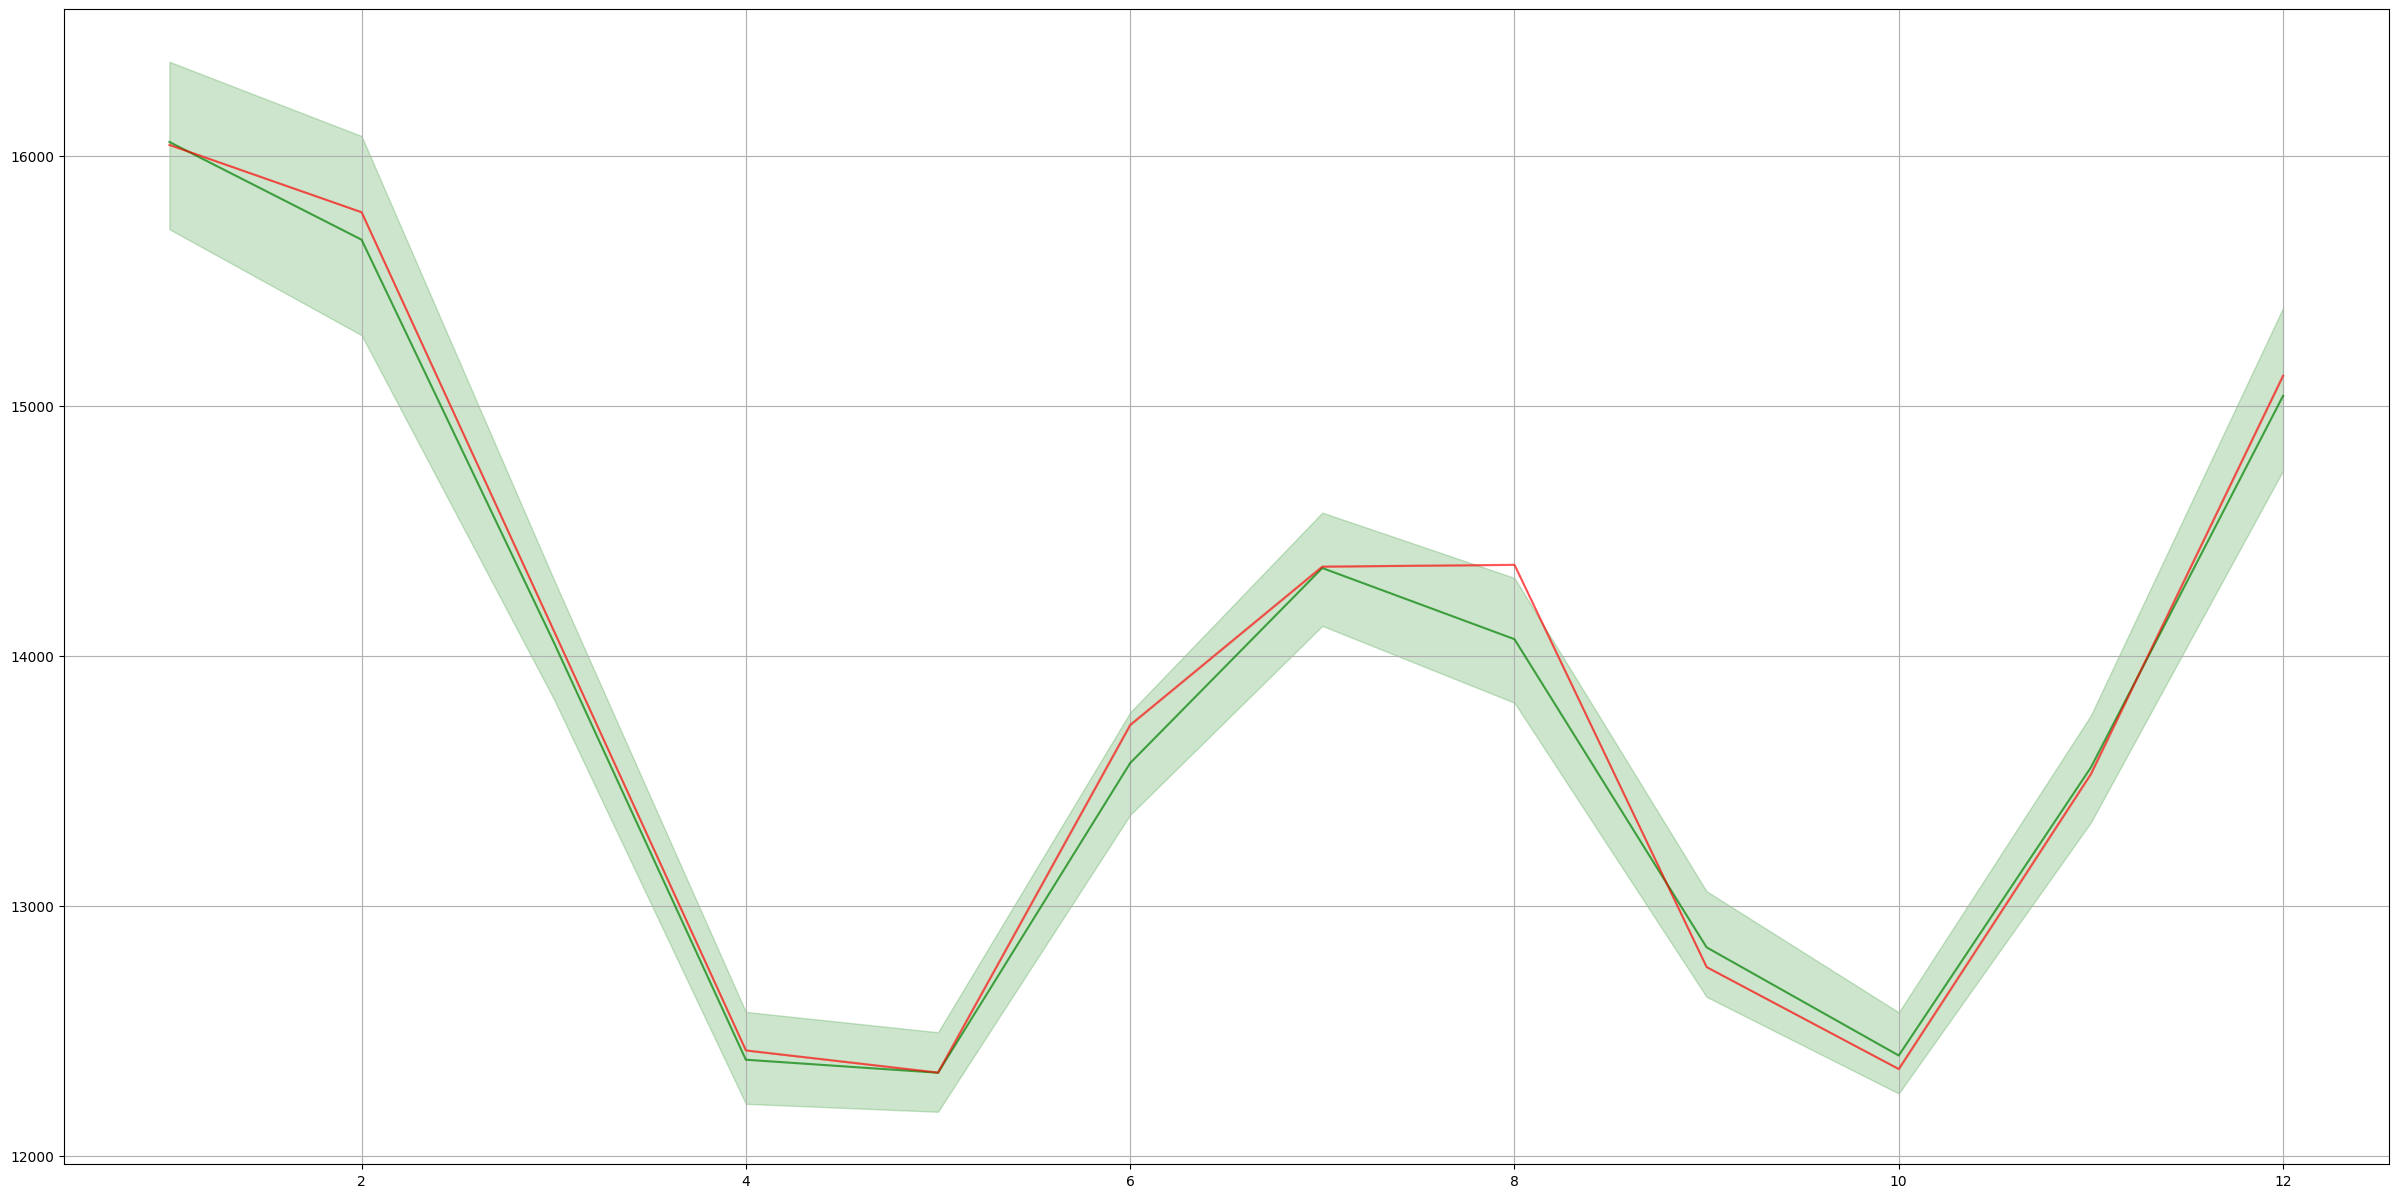

In [166]:
plt.figure(figsize = (30,15))
sns.lineplot(x = test_1_x,y = test_y, color = 'green', alpha = 0.7)
sns.lineplot(x = test_1_x,y = prediction_dtr, color = 'red', alpha = 0.6)
plt.grid()

In [172]:
x2 = df.Year.values
y2 = df.Units.values

In [173]:
train_x_year, test_x_year, train_y_year, test_y_year = tts(x2, y2, test_size = 0.3, random_state = 0)
train_x_year = train_x_year.reshape(-1,1)
test_x_year = test_x_year.reshape(-1,1)
print(train_x_year.shape)
print(test_x_year.shape)

(3537, 1)
(1517, 1)


In [174]:
Logistic.fit(train_x_year, train_y_year)

LogisticRegression()

In [175]:
prediction_year_log = Logistic.predict(test_x_year)

In [176]:
log_year_mse = mean_squared_error(test_y_year, prediction_year_log)
log_year_rmse = np.sqrt(log_year_mse)
log_year_rmse

1846.472801190758

In [177]:
Linear.fit(train_x_year, train_y_year)

LinearRegression()

In [178]:
prediction_year_lin = Linear.predict(test_x_year)

In [179]:
lin_year_mse = mean_squared_error(test_y_year, prediction_year_lin)
lin_year_rmse = np.sqrt(lin_year_mse)
lin_year_rmse

1808.6296678910528

In [180]:
tree_reg.fit(train_x_year, train_y_year)

DecisionTreeRegressor()

In [181]:
prediction_year_dtr = tree_reg.predict(test_x_year)

In [182]:
dtr_year_mse = mean_squared_error(test_y_year, prediction_year_dtr)
dtr_year_rmse = np.sqrt(dtr_year_mse)
dtr_year_rmse

1780.5422734472809

In [207]:
forest_reg_year = RandomForestRegressor()
forest_reg_year.fit(train_x_year, train_y_year)

RandomForestRegressor()

In [208]:
prediction_year_forest = forest_reg_year.predict(test_x_year)

In [209]:
forest_year_mse = mean_squared_error(test_y_year, prediction_year_forest)
forest_year_rmse = np.sqrt(forest_year_mse)
forest_year_rmse

1780.9116589732023

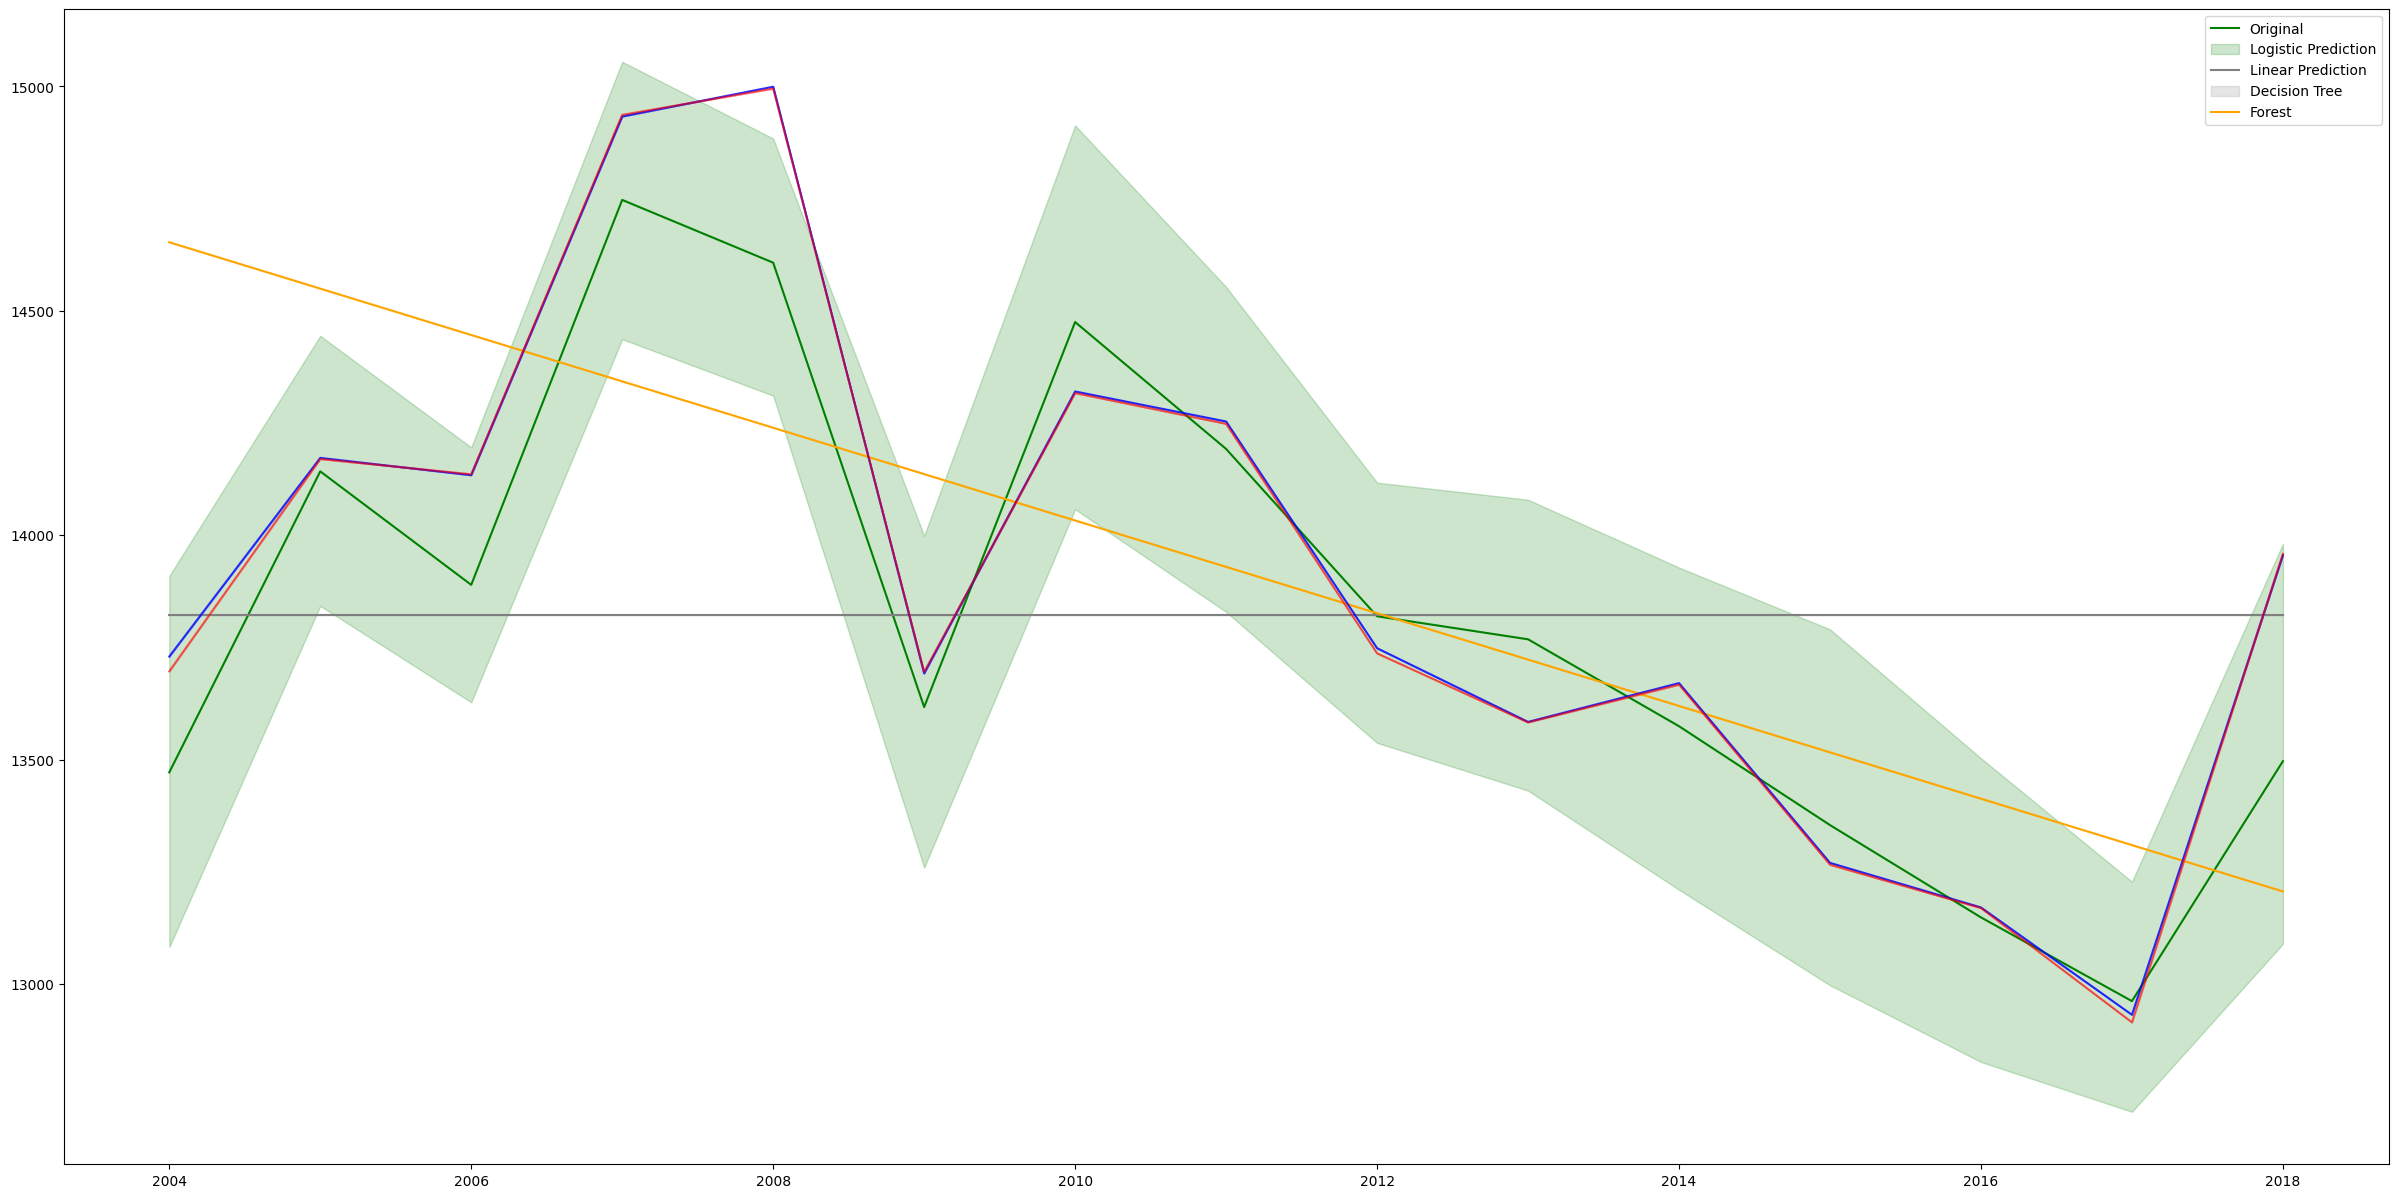

In [187]:
test_1_x_year = test_x_year.reshape(-1)
plt.figure(figsize = (30,15))
sns.lineplot(x = test_1_x_year,y = test_y_year, color = 'green')
sns.lineplot(x = test_1_x_year,y = prediction_year_log, color = 'grey')
sns.lineplot(x = test_1_x_year,y = prediction_year_lin, color = 'orange')
sns.lineplot(x = test_1_x_year,y = prediction_year_dtr, color = 'blue', alpha = 0.8)
sns.lineplot(x = test_1_x_year,y = prediction_year_forest, color = 'red',alpha = 0.6)
plt.legend(["Original","Logistic Prediction","Linear Prediction","Decision Tree","Forest"])
plt.show()

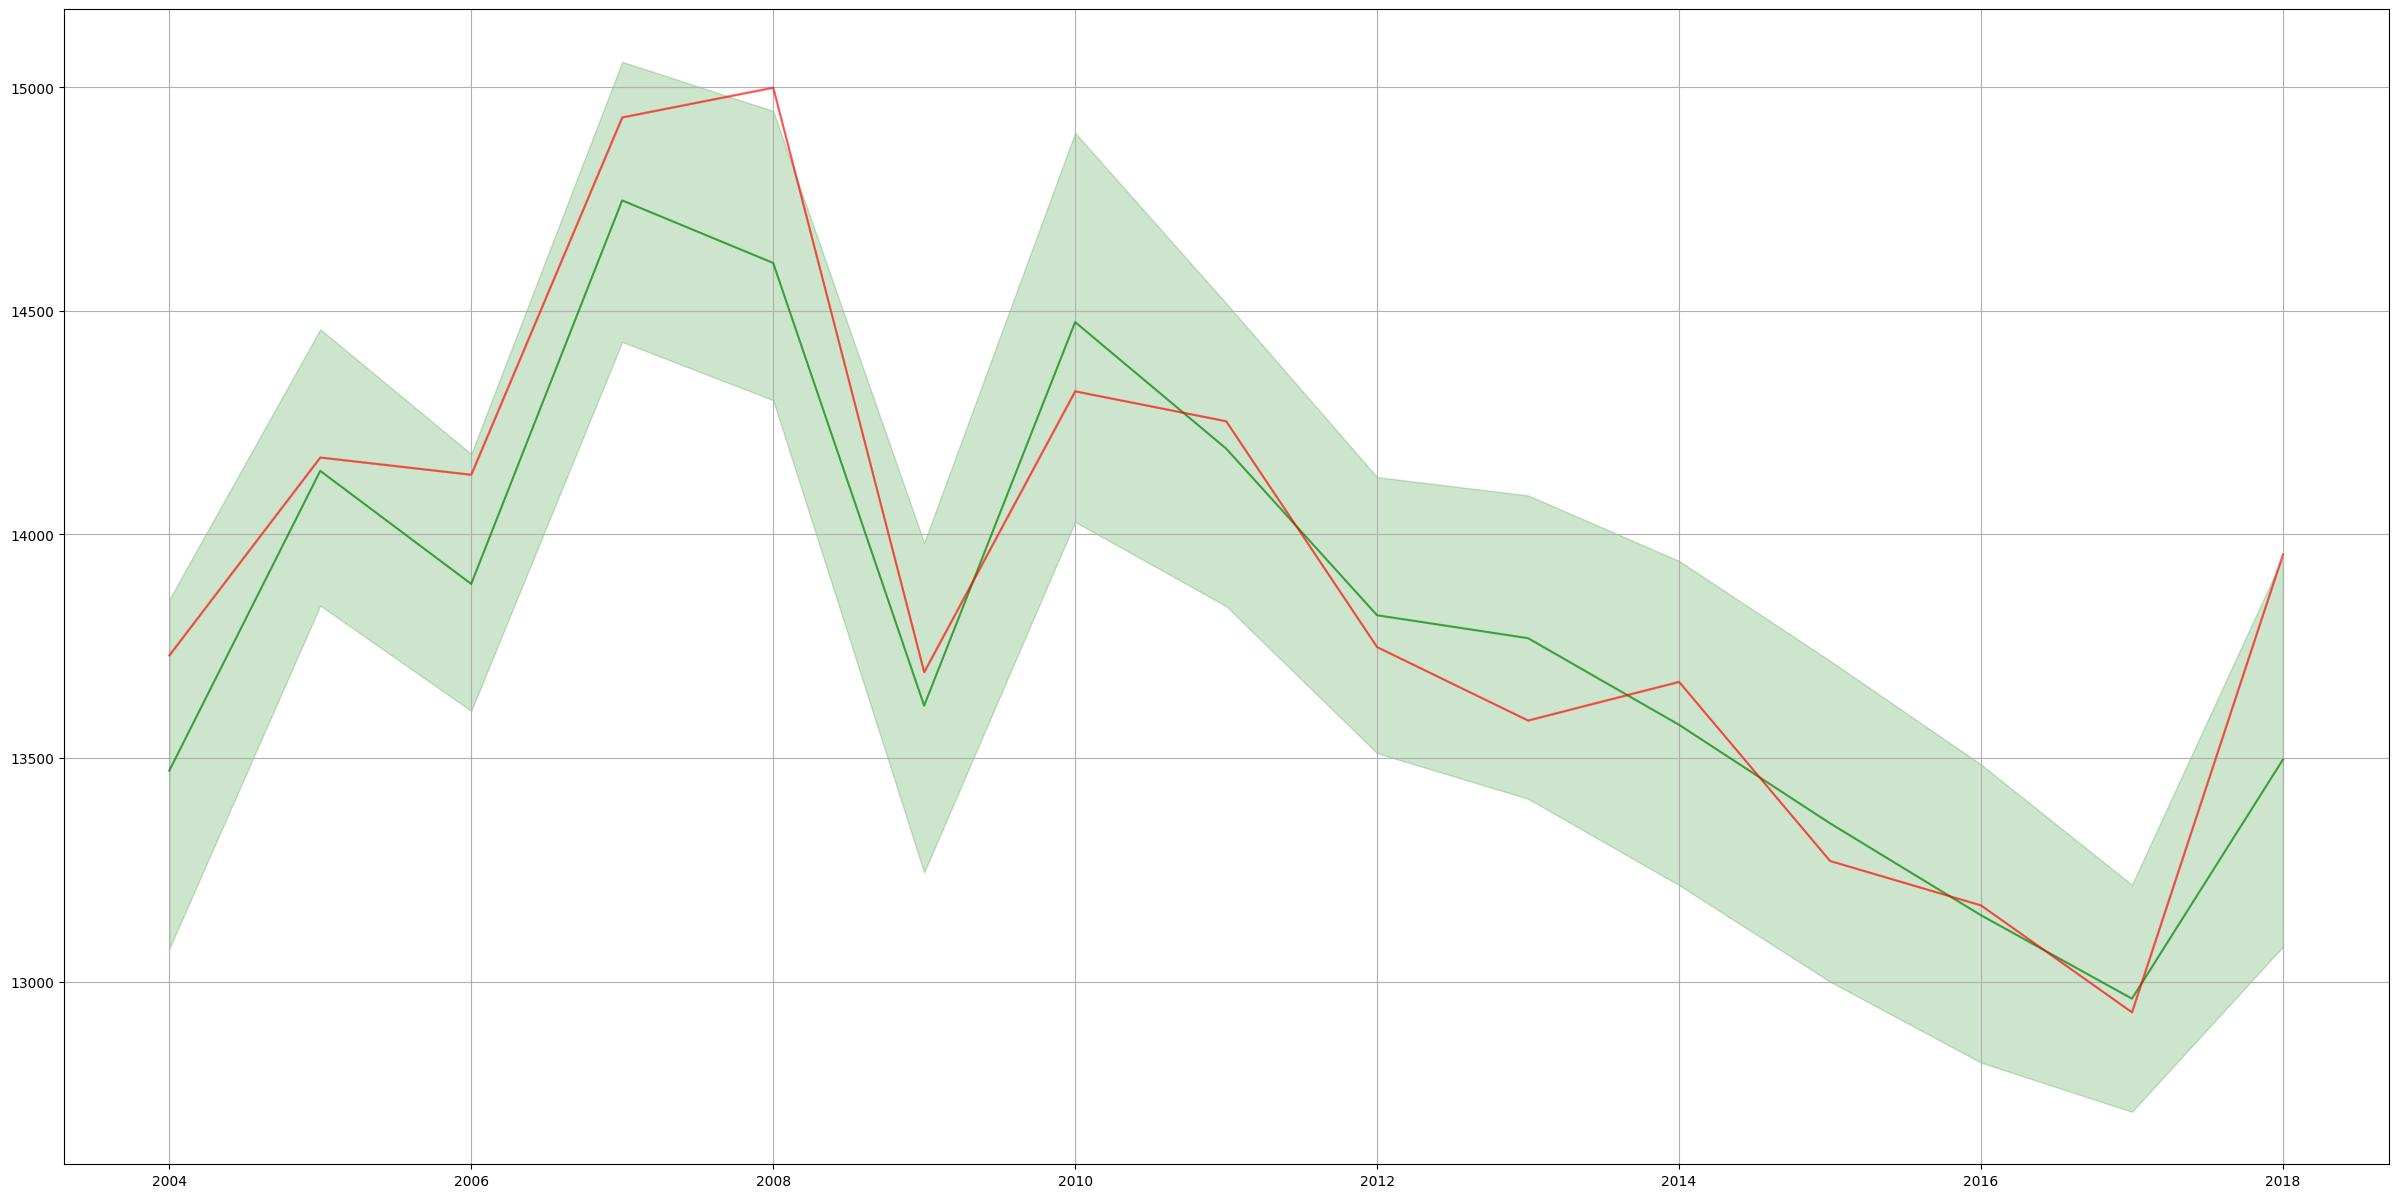

In [189]:
plt.figure(figsize = (30,15))
sns.lineplot(x = test_1_x_year,y = test_y_year, color = 'green', alpha = 0.7)
sns.lineplot(x = test_1_x_year,y = prediction_year_dtr, color = 'red', alpha = 0.6)
plt.grid()

In [211]:
month_input = int(input("Enter month you want to use for prediction :- "))
year_input = int(input("Enter year you want to use for prediction :- "))
month_input = np.array([month_input])
month_input = month_input.reshape(-1,1)
year_input = np.array([year_input])
year_input = year_input.reshape(-1,1)
month_prediction = forest_reg.predict(month_input)
year_prediction = forest_reg_year.predict(year_input)
print("Prediction for month = ",month_prediction[0])
print("Prediction for year = ", year_prediction[0])

Enter month you want to use for prediction :-  5
Enter year you want to use for prediction :-  2008


Prediction for month =  12330.866001841712
Prediction for year =  15009.133612069376


In [212]:
print("Approximated unit consumption may lie between ",month_prediction[0]," and ",year_prediction[0])
print("Mean of unit consumption range ",(month_prediction[0]+year_prediction[0])/2)

Approximated unit consumption may lie between  12330.866001841712  and  15009.133612069376
Mean of unit consumption range  13669.999806955544
